# Notebook to test random Code chunks.
The ultimate Sandbox

In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import matplotlib.pyplot as plt
import pandas as pd
import socket
import matplotlib.cm as cm
from scipy.special import kv

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop-X1"):
    path = "/home/hringbauer/git/HAPSBURG/"
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

#sys.path.append("./Python3/")  # Since now we are in the Root Directory
#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..
#sys.path.append("./Python3/create1000G_Mosaic/")  # Since now we are in the Root Directory
#from createMosaicsMulti import Mosaic_1000G_Multi  # Import the object that can create the Multiruns

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0402.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


In [3]:
df1 = pd.read_csv("./Empirical/HO/combined_roh_dip05.tsv", sep="\t")

In [4]:
df1[df1["full_iid"].str.contains("HGDP00449")]

,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,study,clst_alt,period_alt,include_alt,clst,mean_cov,med_cov,n_cov_snp_read,full_iid,n_cov_snp
393,Mbuti_0,Mbuti,25.682604,54.596603,3,54.596603,3,54.596603,3,25.682604,...,Lazaridis et al. 2014,Mbuti,NaN,1,Mbuti,NaN,NaN,NaN,HGDP00449,551079


In [5]:
df1[df1["full_iid"].str.contains("HGDP00991")]

,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,study,clst_alt,period_alt,include_alt,clst,mean_cov,med_cov,n_cov_snp_read,full_iid,n_cov_snp
413,Ju_hoan_North_1,Ju_hoan_North,14.166605,50.141307,6,27.161806,2,27.161806,2,0.0,...,Lazaridis et al. 2014,Ju_hoan_North,NaN,1,Ju_hoan_North,NaN,NaN,NaN,HGDP00991,552765


## Plot some Bessel Functinos

In [59]:
xlim =[0,20]
x = np.linspace(0.1,20, 10000)

y0 = kv(0, x)
y1 = x * kv(1, x)
y2 = x**2 * kv(2, x)
y3 = x**3 * kv(3, x)

cmap = cm.get_cmap('viridis_r')
cs = cmap(np.linspace(0,0.6,4))

Saved figure to ./figures/dumpster/pw_fraction.png


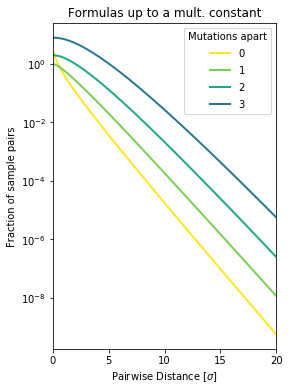

In [65]:
savepath=("./figures/dumpster/pw_fraction.png")

plt.figure(figsize=(4,6))
ax = plt.gca()
ax.plot(x, y0, label=f"$0$", lw=2, c=cs[0])
ax.plot(x, y1, label=f"$1$", lw=2, c=cs[1])
ax.plot(x, y2, label=f"$2$", lw=2, c=cs[2])
ax.plot(x, y3, label=f"$3$", lw=2, c=cs[3])
ax.legend(title="Mutations apart")
ax.set_xlim(xlim)
ax.set_yscale("log")
ax.set_xlabel(f"Pairwise Distance [$\sigma$]")
ax.set_ylabel("Fraction of sample pairs")
ax.set_title("Formulas up to a mult. constant")

if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=400)
    print(f"Saved figure to {savepath}")


plt.show()